# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [39]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [40]:
df.shape

(48726, 5)

In [41]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48726 entries, 0 to 48725
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    48726 non-null  object
 1   state   48726 non-null  object
 2   fips    48726 non-null  int64 
 3   cases   48726 non-null  int64 
 4   deaths  48726 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.9+ MB


In [43]:
# convert the date column from string to datetime datatype
df.date = pd.to_datetime(df.date)

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [44]:
ny_df = df[df['state']=='New York']
fl_df = df[df['state']=='Florida']

In [45]:
ny_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 246 to 48704
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    882 non-null    datetime64[ns]
 1   state   882 non-null    object        
 2   fips    882 non-null    int64         
 3   cases   882 non-null    int64         
 4   deaths  882 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 41.3+ KB


In [46]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [47]:
june2020 = (ny_df['date'] >= '2020-06-01') & (ny_df['date'] <= '2020-06-30')
june2022 = (ny_df['date'] >= '2022-06-01') & (ny_df['date'] <= '2022-06-30')

# ny_df[june2020]
# ny_df[june2020]['deaths'].head(1)

twenty20_june_deaths = (ny_df.loc[ny_df['date'] == '2020-06-30', 'deaths'].iloc[0] - ny_df.loc[ny_df['date'] == '2020-06-01', 'deaths'].iloc[0])
# twenty20_june_deaths

twenty22_june_deaths = (ny_df.loc[ny_df['date'] == '2022-06-30', 'deaths'].iloc[0] - ny_df.loc[ny_df['date'] == '2022-06-01', 'deaths'].iloc[0])
# twenty22_june_deaths

print(f'Covid deaths in June of 2020: {twenty20_june_deaths}\nCovid deaths in June of 2022: {twenty22_june_deaths}')

# to get the total number of cases and deaths in june, subtract cases on first day from cases of last day of that month
# compare cases and deaths from june 2022 against june 2020

Covid deaths in June of 2020: 2010
Covid deaths in June of 2022: 605


In [48]:
ny_df.shape

(882, 5)

In [49]:
ny_df.tail()

,date,state,fips,cases,deaths
48480,2022-07-26,New York,36,5778917,69495
48536,2022-07-27,New York,36,5785423,69522
48592,2022-07-28,New York,36,5793691,69564
48648,2022-07-29,New York,36,5796900,69576
48704,2022-07-30,New York,36,5799922,69576


In [50]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [51]:
#total number of cases
ny_df['cases'].max()

5799922

In [52]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

1979057269

Finding new covid 19 cases on daily basis (new cases added everyday)

In [53]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [54]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
ny_df.tail(1)

,date,state,fips,cases,deaths,new_cases
48704,2022-07-30,New York,36,5799922,69576,3022


In [56]:
fl_df.tail(1)

,date,state,fips,cases,deaths
48680,2022-07-30,Florida,12,6789498,77565


In [72]:
# difference between deaths in florida and new york
death_diff_ny_fl = (fl_df.loc[fl_df['date'] == '2022-07-30', 'deaths'].iloc[0] - ny_df.loc[ny_df['date'] == '2022-07-30', 'deaths'].iloc[0])
death_diff_ny_fl

7989

In [57]:
ny_df['new_cases'].sum()

5799922

In [58]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [59]:
type(ny_new_cases)

pandas.core.series.Series

In [60]:
# ny_df.plot(kind='bar')

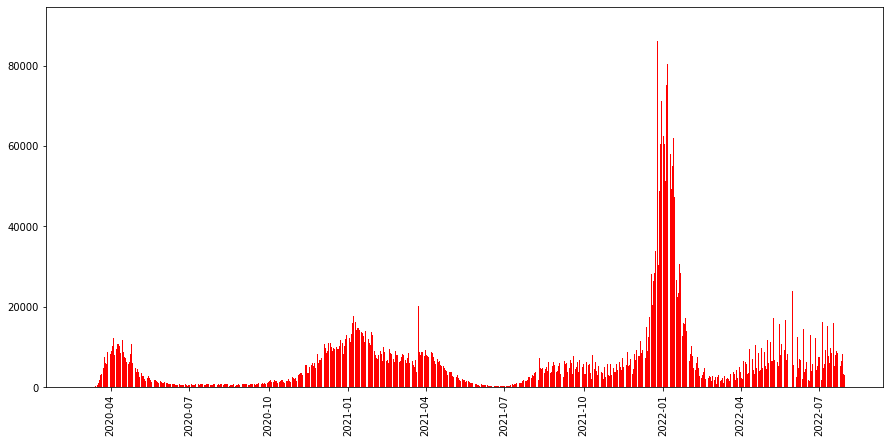

In [61]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [62]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [63]:
# ny_dates_30

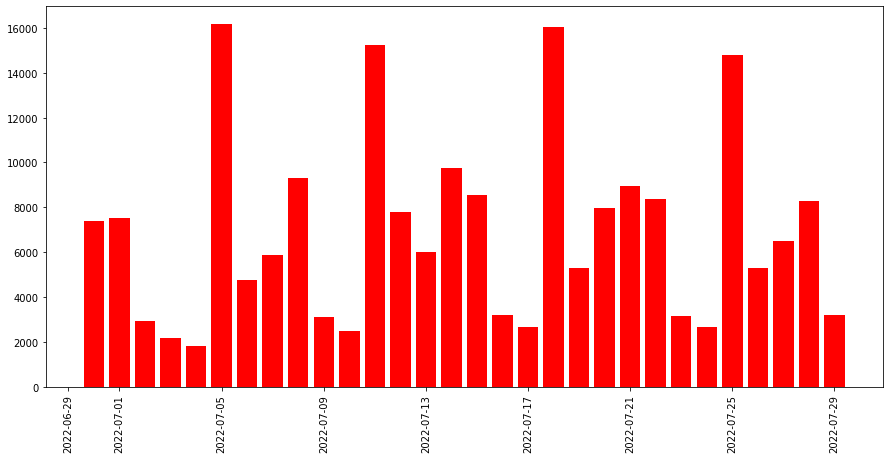

In [64]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color=('red'))
plt.xticks(rotation=90)
plt.show()

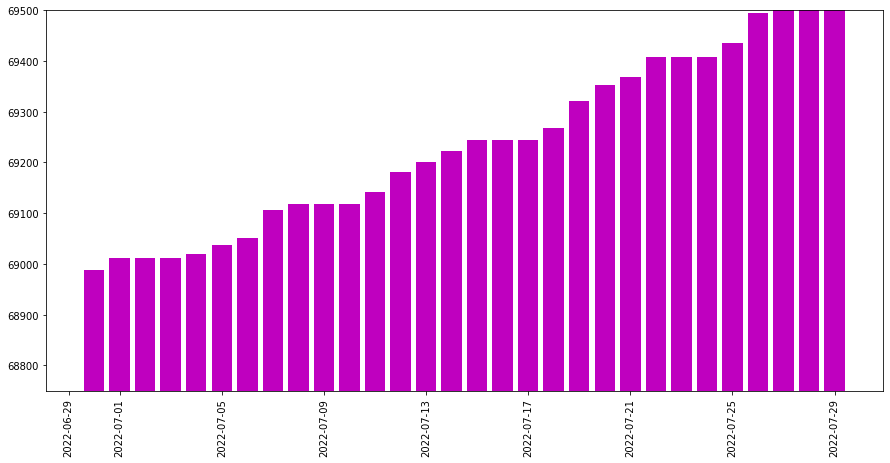

In [65]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='m')
plt.xticks(rotation=90)
plt.ylim(68750, 69500)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [66]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

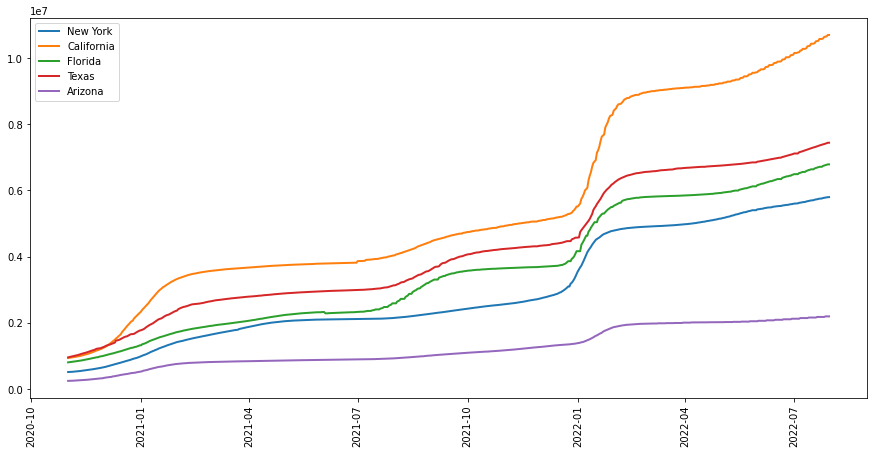

In [67]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

The first deaths that happend in NY was in 2020-03-14.

Comparing june of 2020 and june of 2022, there is a difference of 1405 less deaths in june of 2022. It is about 70% fewer than june of 2020.
Even though NY have a higher number in population, it has a lower number than deaths than Florida where it has a number of 7989 deaths higher than NY, I decided to do the difference netween these two states because they have approximatly the same number in population.




